## reference https://www.youtube.com/watch?v=c36lUUr864M&t=4380s

In [ ]:
import torch
import inspect

def retrieve_name(var):
    callers_local_vars = globals().items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

def printf(x):
    print(f'{retrieve_name(x)}: {x}')

x = torch.randn(3, requires_grad=True)
printf(x)

y = x + 2
printf(y)

z = y * y * 2
z = z.mean()
printf(z)

z.backward()
print(x.grad)

['x']: tensor([-0.1026,  0.1340,  1.3998], requires_grad=True)
['y']: tensor([1.8974, 2.1340, 3.3998], grad_fn=<AddBackward0>)
['z']: 13.141792297363281
tensor([2.5299, 2.8453, 4.5330])


In [ ]:
3.5529 * 3.5529 * 2

25.24619682

## implementing using numpy

In [ ]:
import numpy as np


X = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


# gradient 
# mse = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'prediction before training: f(5) = {forward(5)}')

# training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    #forward pass
    y_pred = forward(X)

    #loss
    l = loss(y, y_pred)

    # gradients
    dw = gradient(X, y, y_pred)

    # updated the weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w}, loss = {l}')

print(f'prediction after training: f(5) = {forward(5)}')

prediction before training: f(5) = 0
epoch 1: w = 1.2, loss = 30.0
epoch 2: w = 1.6799999618530272, loss = 4.799999237060547
epoch 3: w = 1.871999988555908, loss = 0.7680001854896545
epoch 4: w = 1.9487999868392942, loss = 0.1228799968957901
epoch 5: w = 1.9795200133323667, loss = 0.019660834223031998
epoch 6: w = 1.9918080282211301, loss = 0.0031457357108592987
epoch 7: w = 1.9967231869697568, loss = 0.0005033080233260989
epoch 8: w = 1.99868928194046, loss = 8.053186320466921e-05
epoch 9: w = 1.999475698471069, loss = 1.2884394891443662e-05
epoch 10: w = 1.999790253639221, loss = 2.0613531432900345e-06
epoch 11: w = 1.9999160599708554, loss = 3.297340072094812e-07
epoch 12: w = 1.9999664139747617, loss = 5.282345227897167e-08
epoch 13: w = 1.9999865984916685, loss = 8.487816671731707e-09
epoch 14: w = 1.9999946093559262, loss = 1.3369572116062045e-09
epoch 15: w = 1.9999978351593015, loss = 2.1679014139408537e-10
epoch 16: w = 1.9999991369247434, loss = 3.531397396727698e-11
epoch 17

## linear regression using torch

In [ ]:
import torch

X = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x


# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


# gradient 
# mse = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'prediction before training: f(5) = {forward(5)}')

# training
learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
    #forward pass
    y_pred = forward(X)

    #loss
    l = loss(y, y_pred)

    # gradients = backward pass
    l.backward()

    # updated the weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero the gradients
    w.grad.zero_()

    if epoch % 5 == 0 or epoch == n_iters-1:
        print(f'epoch {epoch+1}: w = {w}, loss = {l}')

print(f'prediction after training: f(5) = {forward(5)}')

prediction before training: f(5) = 0.0
epoch 1: w = 0.29999998211860657, loss = 30.0
epoch 6: w = 1.2457009553909302, loss = 5.9062323570251465
epoch 11: w = 1.6653136014938354, loss = 1.1627856492996216
epoch 16: w = 1.8514978885650635, loss = 0.22892260551452637
epoch 21: w = 1.934108853340149, loss = 0.0450688973069191
epoch 26: w = 1.9707638025283813, loss = 0.008872910402715206
epoch 31: w = 1.987027645111084, loss = 0.0017468547448515892
epoch 36: w = 1.99424409866333, loss = 0.00034391897497698665
epoch 41: w = 1.9974461793899536, loss = 6.770494655938819e-05
epoch 46: w = 1.9988667964935303, loss = 1.3328777640708722e-05
epoch 50: w = 1.999408483505249, loss = 3.632284688137588e-06
prediction after training: f(5) = 9.997042655944824


## automatic torch training

In [ ]:
import torch
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([[5]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)


print(f'prediction before training: f(5) = {model(X_test).item()}')

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    #forward pass
    y_pred = model(X)

    #loss
    l = loss(y, y_pred)

    # gradients = backward pass
    l.backward()

    # updated the weights
    optimiser.step()

    # zero the gradients
    optimiser.zero_grad()

    if epoch % 20 == 0 or epoch == n_iters-1:
        w, b = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item()}, loss = {l}')

print(f'prediction before training: f(5) = {model(X_test).item()}')

4 1
prediction before training: f(5) = -1.0928696393966675
epoch 1: w = -0.19662858545780182, loss = 36.66752243041992
epoch 21: w = 0.3620397746562958, loss = 18.73700714111328
epoch 41: w = 0.7613598108291626, loss = 9.594871520996094
epoch 61: w = 1.0468980073928833, loss = 4.933378219604492
epoch 81: w = 1.2511903047561646, loss = 2.556285858154297
epoch 101: w = 1.3974684476852417, loss = 1.3438680171966553
epoch 121: w = 1.502320408821106, loss = 0.7252501249313354
epoch 141: w = 1.5775905847549438, loss = 0.4093782305717468
epoch 161: w = 1.6317358016967773, loss = 0.24786363542079926
epoch 181: w = 1.6707953214645386, loss = 0.16505113244056702
epoch 201: w = 1.699080467224121, loss = 0.12236984074115753
epoch 221: w = 1.719670057296753, loss = 0.10015459358692169
epoch 241: w = 1.73476243019104, loss = 0.08837875723838806
epoch 261: w = 1.7459272146224976, loss = 0.08193078637123108
epoch 281: w = 1.7542853355407715, loss = 0.07820448279380798
epoch 301: w = 1.7606370449066162

In [ ]:
import torch
import torch.nn as nn


X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([[5]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)


print(f'prediction before training: f(5) = {model(X_test).item()}')

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    #forward pass
    y_pred = model(X)

    #loss
    l = loss(y, y_pred)

    # gradients = backward pass
    l.backward()

    # updated the weights
    optimiser.step()

    # zero the gradients
    optimiser.zero_grad()

    if epoch % 20 == 0 or epoch == n_iters-1:
        w, b = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item()}, loss = {l}')

print(f'prediction before training: f(5) = {model(X_test).item()}')

4 1
prediction before training: f(5) = 1.507454752922058
epoch 1: w = 0.6909193396568298, loss = 23.828542709350586
epoch 21: w = 1.9872854948043823, loss = 0.0166370440274477
epoch 41: w = 2.019594192504883, loss = 0.000620208156760782
epoch 61: w = 2.019270658493042, loss = 0.0005406474811024964
epoch 81: w = 2.01816987991333, loss = 0.0004795403510797769
epoch 100: w = 2.017164468765259, loss = 0.00042789484723471105
prediction before training: f(5) = 10.035356521606445


## chapter 7

100 1
epoch - 10, loss = 4235.01123046875
epoch - 20, loss = 3165.249267578125
epoch - 30, loss = 2390.43505859375
epoch - 40, loss = 1828.6893310546875
epoch - 50, loss = 1421.046142578125
epoch - 60, loss = 1124.9803466796875
epoch - 70, loss = 909.7840576171875
epoch - 80, loss = 753.25537109375
epoch - 90, loss = 639.325439453125
epoch - 99, loss = 563.516357421875


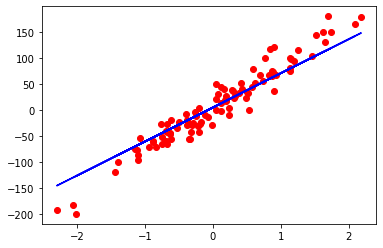

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

# model
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimiser
learning_rate = 0.01
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update
    optimiser.step()

    optimiser.zero_grad()

    if epoch > 0 and (epoch % 10 == 0 or epoch+1==num_epochs):
        print(f'epoch = {epoch}, loss = {loss.item()}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, predicted, 'b')
plt.show()

## logistic regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# mode;
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.lin = nn.Linear(n_input_features, 1)

    def forward(self, x):
        logits = self.lin(x)
        y_predicted = torch.sigmoid(logits)
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimiser
learning_rate = 0.01
criterion = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # update
    optimiser.step()

    optimiser.zero_grad()

    if epoch > 0 and (epoch % 10 == 0 or epoch+1==num_epochs):
        print(f'epoch = {epoch}, loss = {loss.item()}')


# benchmark
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc}')

epoch = 10, loss = 0.6066616773605347
epoch = 20, loss = 0.48761555552482605
epoch = 30, loss = 0.4159747064113617
epoch = 40, loss = 0.3682396709918976
epoch = 50, loss = 0.333825945854187
epoch = 60, loss = 0.30757975578308105
epoch = 70, loss = 0.2867344319820404
epoch = 80, loss = 0.269671231508255
epoch = 90, loss = 0.2553757429122925
epoch = 99, loss = 0.24431678652763367
accuracy = 0.9035087823867798


## loading data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
!head wine.data

--2021-11-29 02:28:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2021-11-29 02:28:55 (71.7 MB/s) - ‘wine.data’ saved [10782/10782]

1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform=None):
        xy = np.loadtxt('./wine.data', delimiter=',', dtype=np.float32)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.nsamples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.nsamples

class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        return torch.from_numpy(inputs), torch.from_numpy(labels)
        

# dataset = WineDataset(transform=ToTensor())
dataset = WineDataset(transform=None)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# data_iter = iter(dataloader)
# data = data_iter.next()
# features, labels = data
# print(features, labels)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / 4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):




        if (i > 0 and i % 10 == 0) or (i+1==n_iterations):
            print(f'epoch={epoch+1}/{num_epochs}, step={i+1}/{n_iterations}, inputs {inputs.shape}')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
178 45
epoch=1/2, step=11/45, inputs torch.Size([4, 13])
epoch=1/2, step=21/45, inputs torch.Size([4, 13])
epoch=1/2, step=31/45, inputs torch.Size([4, 13])
epoch=1/2, step=41/45, inputs torch.Size([4, 13])
epoch=1/2, step=45/45, inputs torch.Size([2, 13])
epoch=2/2, step=11/45, inputs torch.Size([4, 13])
epoch=2/2, step=21/45, inputs torch.Size([4, 13])
epoch=2/2, step=31/45, inputs torch.Size([4, 13])
epoch=2/2, step=41/45, inputs torch.Size([4, 13])
epoch=2/2, step=45/45, inputs torch.Size([2, 13])


In [ ]:
len(dataloader)

45

## transforms for the datasets

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform=None):
        xy = np.loadtxt('./wine.data', delimiter=',', dtype=np.float32)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.nsamples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.nsamples

class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        return torch.from_numpy(inputs), torch.from_numpy(labels)
        

# dataset = WineDataset(transform=ToTensor())
dataset = WineDataset(transform=None)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


## softmax and cross entropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2., 1., 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2., 1., 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [ ]:
import torch
import torch.nn as nn
import numpy as np

def crossentropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

Y = np.array([1, 0, 0])

y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = crossentropy(Y, y_pred_good)
l2 = crossentropy(Y, y_pred_bad)

print(f'loss l1: {l1}')
print(f'loss l2: {l2}')

loss l1: 0.35667494393873245
loss l2: 2.3025850929940455


In [ ]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])

# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[2., 1., 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2., 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)


print(f'loss l1: {l1.item()}')
print(f'loss l2: {l2.item()}')

loss l1: 0.4170299470424652
loss l2: 1.840616226196289


## multiclass python

In [ ]:
import torch
import torch.nn as nn

class NN2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NN2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NN2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax


## binary class

In [ ]:
import torch
import torch.nn as nn

class NN1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NN2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NN2(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() # applies softmax


## feed forward network

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 1e-3

# mnist
train_data = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(
    dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_data, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


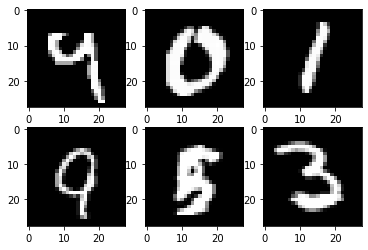

In [ ]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item()}')

    # test
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)

            # values, index
            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct = (predictions == labels).sum().item()

        acc = 100. * n_correct / n_samples
        print(f'accuracy = {acc}, epoch {epoch+1} / {num_epochs}')

epoch 1 / 2, step 100/600, loss=0.39637401700019836
epoch 1 / 2, step 200/600, loss=0.34752100706100464
epoch 1 / 2, step 300/600, loss=0.4340099096298218
epoch 1 / 2, step 400/600, loss=0.3616667091846466
epoch 1 / 2, step 500/600, loss=0.18314634263515472
epoch 1 / 2, step 600/600, loss=0.24166983366012573
accuracy = 0.91, epoch 1 / 2
epoch 2 / 2, step 100/600, loss=0.3634234368801117
epoch 2 / 2, step 200/600, loss=0.2418661117553711
epoch 2 / 2, step 300/600, loss=0.41540470719337463
epoch 2 / 2, step 400/600, loss=0.18261335790157318
epoch 2 / 2, step 500/600, loss=0.1900748312473297
epoch 2 / 2, step 600/600, loss=0.10804807394742966
accuracy = 0.93, epoch 2 / 2


## convolutional neural networks

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 1e-3

# dataset has PIL image of images of range [0, 1]
# we transform them to tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# implement conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # original shape 4, 3, 32, 32 -> 4, 3, 1024
        # input layer = 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 1000 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item()}')
    
    # test
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # max returns (values, index)
            _, predictions = torch.max(outputs, 1)
            n_samples += labels.size(0)
            n_correct = (predictions == labels).sum().item()

            for i in range(batch_size):
                label = labels[i]
                pred = predictions[i]
                if label == pred:
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

        acc = 100. * n_correct / n_samples
        print(f'accuracy = {acc}, epoch {epoch+1} / {num_epochs}')

for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

Files already downloaded and verified
Files already downloaded and verified
epoch 1 / 4, step 1000/12500, loss=2.2996878623962402
epoch 1 / 4, step 2000/12500, loss=2.3087472915649414
epoch 1 / 4, step 3000/12500, loss=2.3160386085510254
epoch 1 / 4, step 4000/12500, loss=2.3240747451782227
epoch 1 / 4, step 5000/12500, loss=2.295046329498291
epoch 1 / 4, step 6000/12500, loss=2.3031277656555176
epoch 1 / 4, step 7000/12500, loss=2.290630340576172
epoch 1 / 4, step 8000/12500, loss=2.3060786724090576
epoch 1 / 4, step 9000/12500, loss=2.307304859161377
epoch 1 / 4, step 10000/12500, loss=2.30359148979187
epoch 1 / 4, step 11000/12500, loss=2.2998859882354736
epoch 1 / 4, step 12000/12500, loss=2.300567388534546
accuracy = 0.02, epoch 1 / 4
epoch 2 / 4, step 1000/12500, loss=2.3168773651123047
epoch 2 / 4, step 2000/12500, loss=2.2853174209594727
epoch 2 / 4, step 3000/12500, loss=2.113755226135254
epoch 2 / 4, step 4000/12500, loss=2.020026922225952
epoch 2 / 4, step 5000/12500, loss=2

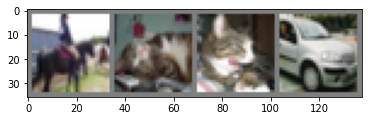

image shape torch.Size([4, 3, 32, 32])
conv1 shape torch.Size([4, 6, 28, 28])
pool shape torch.Size([4, 6, 14, 14])
conv2 shape torch.Size([4, 16, 10, 10])
pool2 shape torch.Size([4, 16, 5, 5])


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 1e-3

# dataset has PIL image of images of range [0, 1]
# we transform them to tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)

imshow(torchvision.utils.make_grid(images))

print('image shape', images.shape)

conv1 = nn.Conv2d(3, 6, 5)
x = conv1(images)
print('conv1 shape', x.shape)


pool = nn.MaxPool2d(2, 2)
x = pool(x)
print('pool shape', x.shape)

conv2 = nn.Conv2d(6, 16, 5)
x = conv2(x)
print('conv2 shape', x.shape)

x = pool(x)
print('pool2 shape', x.shape)

In [ ]:
for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of plane: 49.6 %
Accuracy of car: 70.2 %
Accuracy of bird: 25.3 %
Accuracy of cat: 15.6 %
Accuracy of deer: 21.2 %
Accuracy of dog: 56.2 %
Accuracy of frog: 58.1 %
Accuracy of horse: 50.4 %
Accuracy of ship: 56.6 %
Accuracy of truck: 42.8 %


## transfer learning

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
}

In [12]:
!mkdir ./data
!cd data
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip
!mv hymenoptera_data data/

mkdir: cannot create directory ‘./data’: File exists
--2022-05-19 05:29:08--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.64.174.119, 18.64.174.42, 18.64.174.109, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.64.174.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip.1’

hymenoptera_data.zi 100%[===================>]  45.10M   111MB/s    in 0.4s    

2022-05-19 05:29:08 (111 MB/s) - ‘hymenoptera_data.zip.1’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1

In [13]:
# !mv hymenoptera_data data/
!ls -ltr data

total 4
drwxr-xr-x 4 root root 4096 Mar 13  2017 hymenoptera_data


In [14]:
data_dir = 'data/hymenoptera_data'
sets = ['train', 'val']
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=4, num_workers=0) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
print(class_names)

['ants', 'bees']


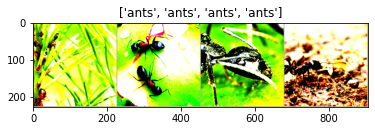

In [15]:
def imshow(inp, title):
    inp = inp.numpy().transpose((1,2,0))
    inp = std + inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [24]:
def train_model(model, criterion, optimizer, scheduler, n_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0

    for epoch in range(n_epochs):
        print(f'epoch: {epoch}/{n_epochs-1}')
        print('-'*20)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0
            running_correct = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                #forward
                # track history only if train
                with torch.set_grad_enabled(phase=='train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward. optimise only if phase is train
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_correct += torch.sum(preds==labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_loss.double() / dataset_sizes[phases]

            print('{} Loss: {} acc: {}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model for the best weights
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'training completed in {time_elapsed//60:.0f}m and {time_elapsed%60:.0f}s')
    print('Best val Acc: {:4f}'.format(best_acc))

    # load model best weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

# scheduler
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# train
model = train_model(model, criterion, optimizer, step_lr_scheduler, 25)

epoch: 0/24
--------------------


#### freeze everything and only train the last layer

In [18]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
    
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

# scheduler
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# train
model = train_model(model, criterion, optimizer, step_lr_scheduler, 25)

NameError: ignored